In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [28]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("breast-cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [30]:
df.info() #there are 32 features available
#among which id, unamed 32 need to be droped and target variable is diagnosis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [31]:
df.shape

(569, 33)

In [32]:
df.drop(columns = ['id', 'Unnamed: 32'], inplace =True)
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
df.isnull().sum()   #no null values

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

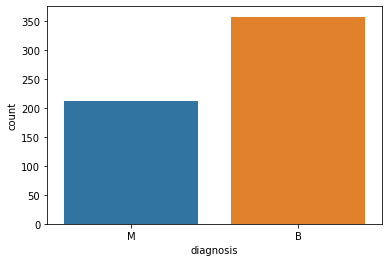

In [34]:
# lets see the target variable
sns.countplot(df['diagnosis']) 

In [35]:
#see the count of malignant and benign cell in the database
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [36]:
#check on outlier

#find features with int and float datatype
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [38]:
df_sub = df.select_dtypes(["float64"]).columns
df_sub

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1
5 0
5 1
6 0
6 1
7 0
7 1
8 0
8 1
9 0
9 1
10 0
10 1
11 0
11 1
12 0
12 1
13 0
13 1
14 0
14 1


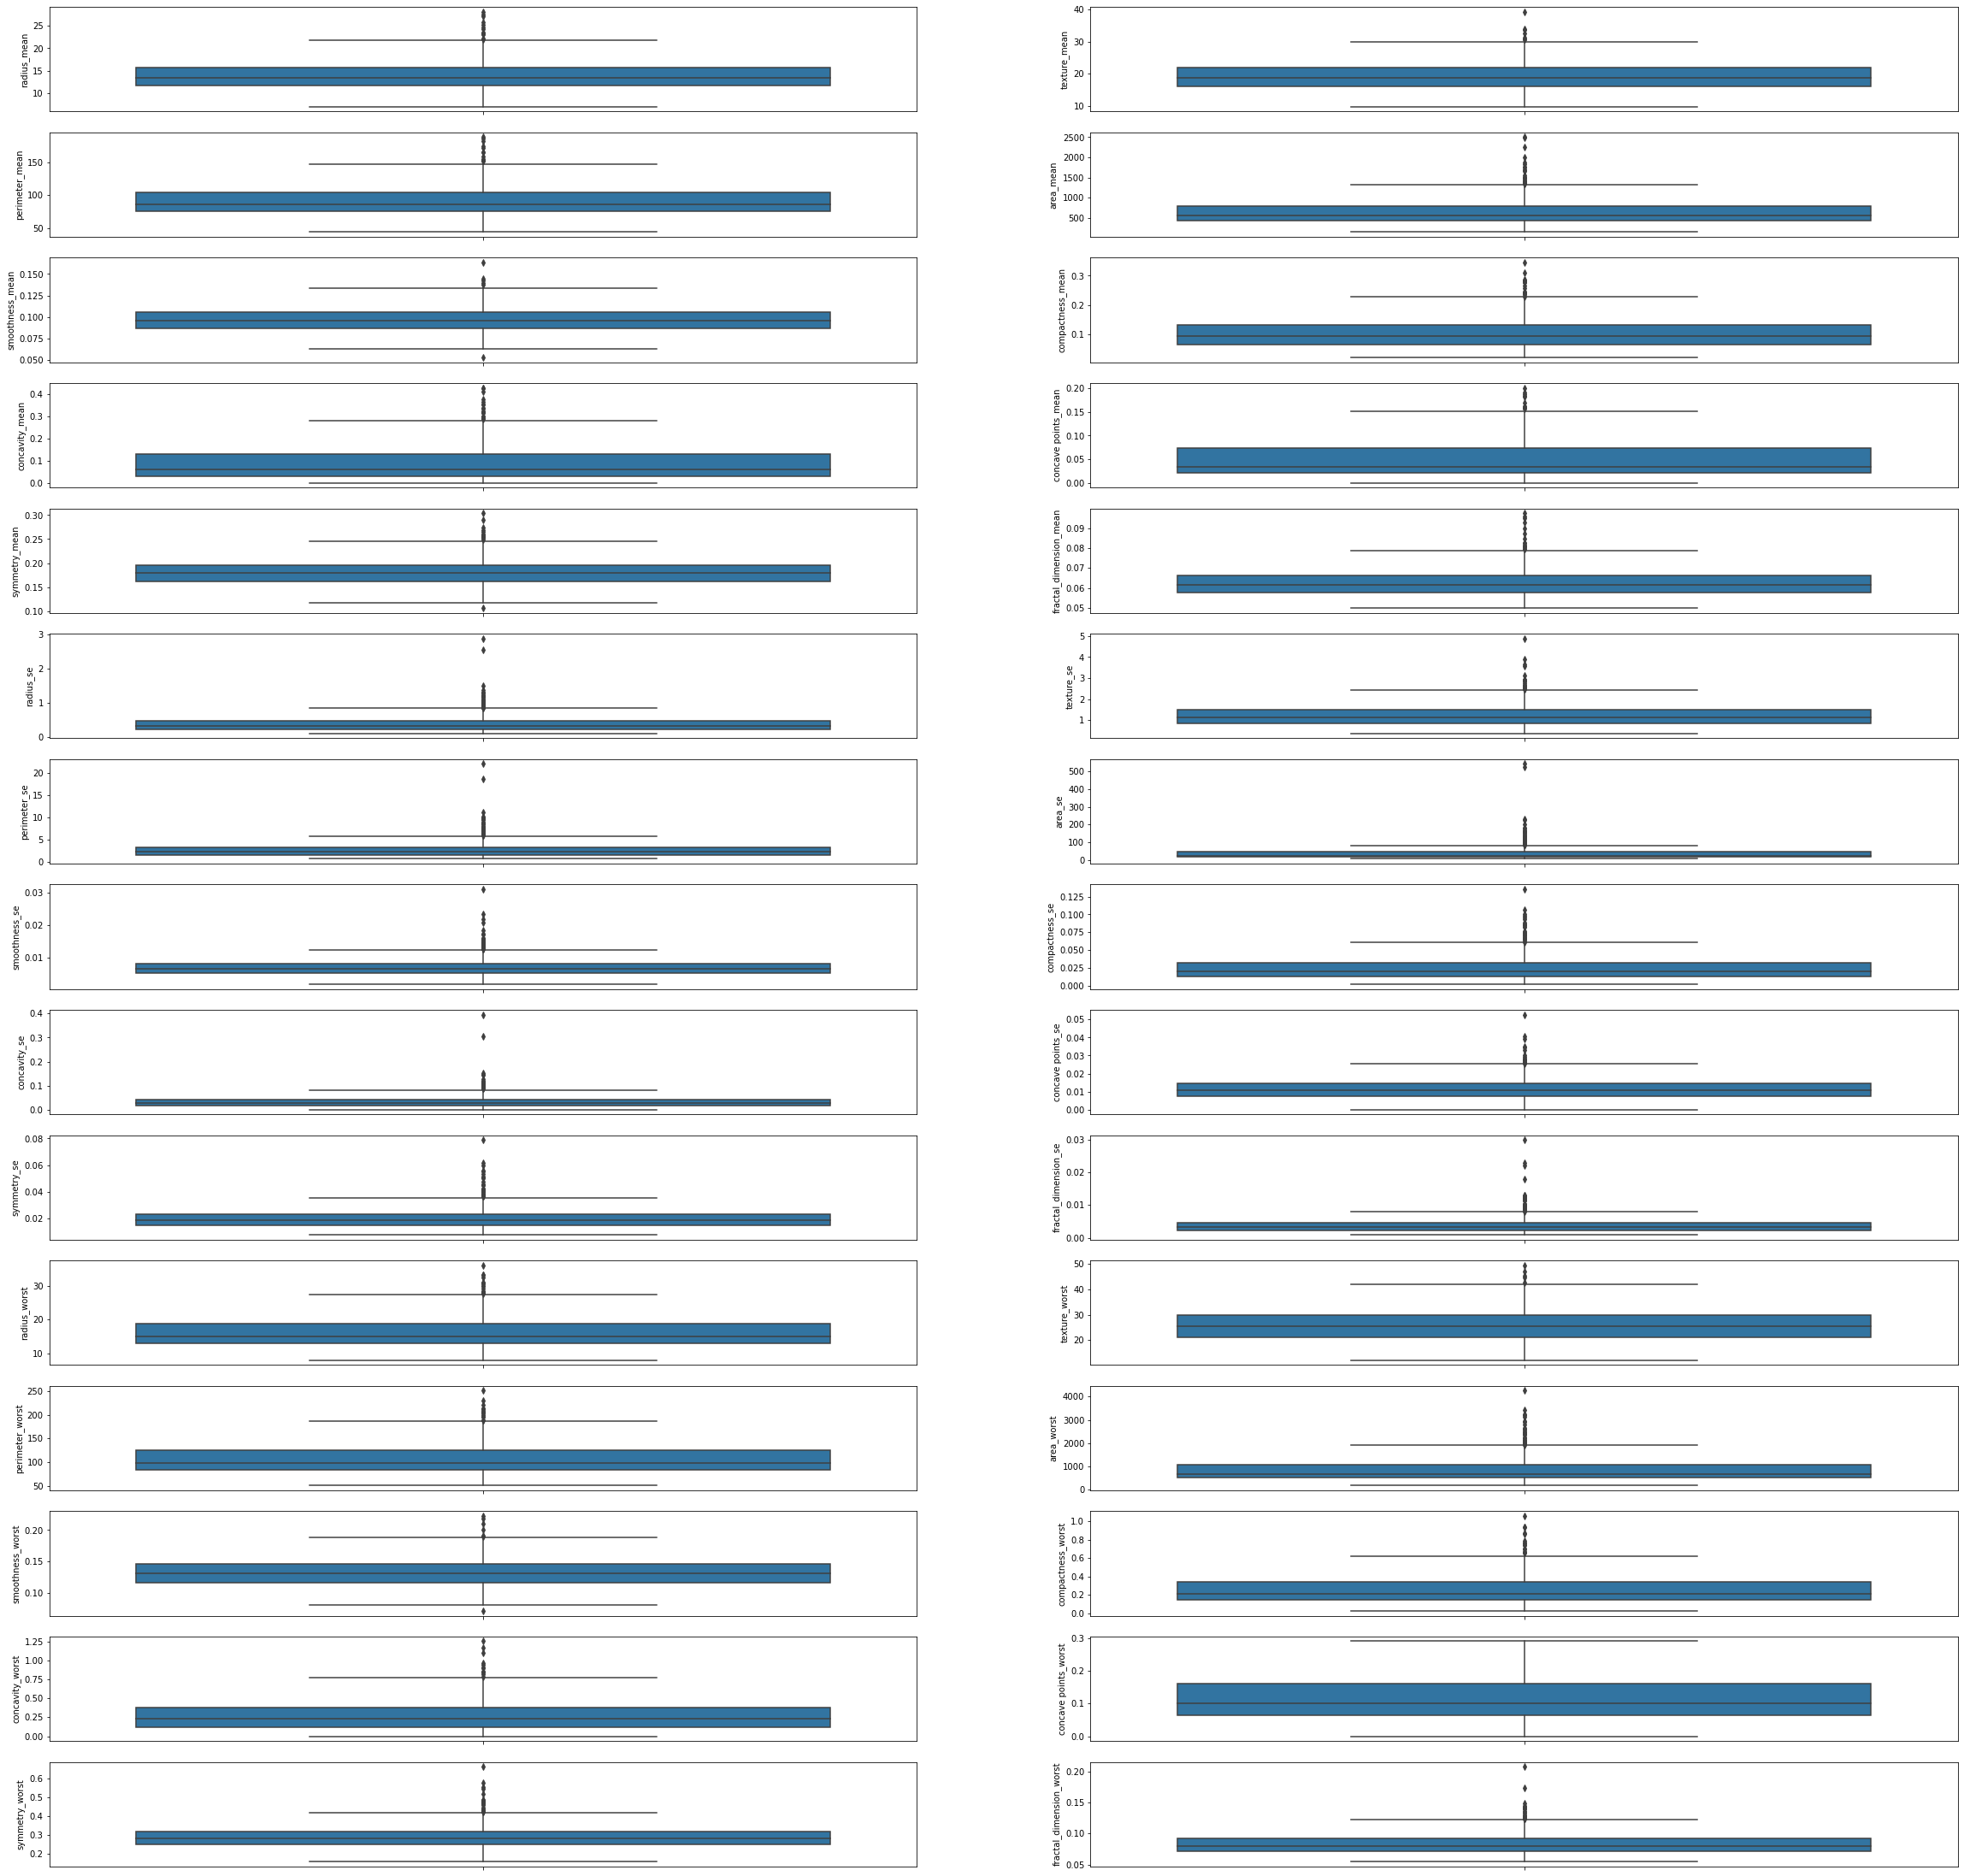

In [39]:
fig, axs=plt.subplots(nrows=15, ncols=2, figsize=(40,40))
for i in range(0, len(df_sub.values)):
    rows=i //2
    columns=i % 2
    print(rows, columns)
    ax=axs[rows, columns]
    sns.boxplot(y=df_sub[i], data=df, ax=ax)

In [40]:

df_sub = df.drop('diagnosis', 1)
df_sub

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [54]:
def cap_data(df_sub):
    for col in df_sub.columns:
        if (((df_sub[col].dtype)=='float64') | ((df_sub[col].dtype)=='int64')):
            percentiles = df_sub[col].quantile([0.05,0.95]).values
            df_sub[col][df_sub[col] <= percentiles[0]] = percentiles[0]
            df_sub[col][df_sub[col] >= percentiles[1]] = percentiles[1]
        else:
            df_sub[col]=df_sub[col]
    return df_sub

final_df=cap_data(df_sub)

In [55]:
final_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99000,13.0928,122.8000,1001.000,0.118400,0.20870,0.242492,0.125644,0.230552,0.076066,...,25.3800,17.330,171.4240,2009.360,0.162200,0.563832,0.681828,0.236392,0.405896,0.118900
1,20.57000,17.7700,132.9000,1309.080,0.084740,0.07864,0.086900,0.070170,0.181200,0.056670,...,24.9900,23.410,158.8000,1956.000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,19.69000,21.2500,130.0000,1203.000,0.109600,0.15990,0.197400,0.125644,0.206900,0.059990,...,23.5700,25.530,152.5000,1709.000,0.144400,0.424500,0.450400,0.236392,0.361300,0.087580
3,11.42000,20.3800,77.5800,386.100,0.118708,0.20870,0.241400,0.105200,0.230552,0.076066,...,14.9100,26.500,98.8700,567.700,0.171504,0.563832,0.681828,0.236392,0.405896,0.119352
4,20.29000,14.3400,135.1000,1297.000,0.100300,0.13280,0.198000,0.104300,0.180900,0.058830,...,22.5400,16.670,152.2000,1575.000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.57360,22.3900,135.7720,1309.080,0.111000,0.11590,0.242492,0.125644,0.172600,0.056230,...,25.4500,26.400,166.1000,2009.360,0.141000,0.211300,0.410700,0.221600,0.213060,0.071150
565,20.13000,27.1500,131.2000,1261.000,0.097800,0.10340,0.144000,0.097910,0.175200,0.055330,...,23.6900,36.288,155.0000,1731.000,0.116600,0.192200,0.321500,0.162800,0.257200,0.066370
566,16.60000,27.1500,108.3000,858.100,0.084550,0.10230,0.092510,0.053020,0.159000,0.056480,...,18.9800,34.120,126.7000,1124.000,0.113900,0.309400,0.340300,0.141800,0.221800,0.078200
567,20.57360,27.1500,135.7720,1265.000,0.117800,0.20870,0.242492,0.125644,0.230552,0.070160,...,25.6160,36.288,171.4240,1821.000,0.165000,0.563832,0.681828,0.236392,0.405896,0.119352


<AxesSubplot:ylabel='texture_mean'>

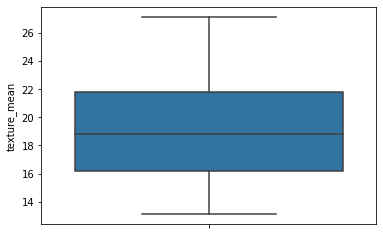

In [67]:
sns.boxplot(y=final_df['texture_mean'])

In [57]:
X = final_df
y = df.diagnosis
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [58]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size = 0.2, random_state = 20)  #80% of data is used for training and rest 20% for testing

In [59]:
print("The shape of training set: ", X_trainset.shape)
print("The shape of testing set: ", X_testset.shape)

The shape of training set:  (455, 30)
The shape of testing set:  (114, 30)


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
sc1=StandardScaler()
X_trainset = sc1.fit_transform(X_trainset)
X_testset=sc1.transform(X_testset)

In [61]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', random_state=1)))
models.append(('DT', DecisionTreeClassifier(criterion = 'gini', random_state=1)))
models.append(('RD', RandomForestClassifier(criterion='entropy',random_state=1)))
models.append(('XG', XGBClassifier(n_estimators=50,max_depth=4)))

result = dict()
for name, model in models:
    kfold =KFold(n_splits=2, random_state =2, shuffle=True)
    scores = cross_val_score(model,X_trainset,y_trainset,  cv=kfold)
    result[name] = (scores.mean(), scores.std())
    
    
print("name mean_error std_error")
for key, value in result.items():
    print(key, value)

[16:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
name mean_error std_error
LR (0.9780315325759332, 0.004347322049617408)
DT (0.9296893113841873, 0.008636679805239966)
RD (0.9626323518046217, 0.002279928897132688)
XG (0.9582367261766751, 0.002289589612798515)


E:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
clf_1 = DecisionTreeClassifier(criterion = 'gini', random_state=1).fit(X_trainset,y_trainset)
#predicting our results
y_pred = clf_1.predict(X_testset)
#find the accuracy of the model
acc_1 = accuracy_score(y_testset,clf_1.predict(X_testset))
print('Accuracy is: ',acc_1)

Accuracy is:  0.9473684210526315


In [63]:
clf_1.feature_importances_

array([0.02487127, 0.        , 0.        , 0.        , 0.02933534,
       0.        , 0.00183618, 0.        , 0.        , 0.        ,
       0.00918808, 0.        , 0.        , 0.02251301, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01287088,
       0.        , 0.04503597, 0.        , 0.13746644, 0.        ,
       0.        , 0.03287875, 0.68400407, 0.        , 0.        ])

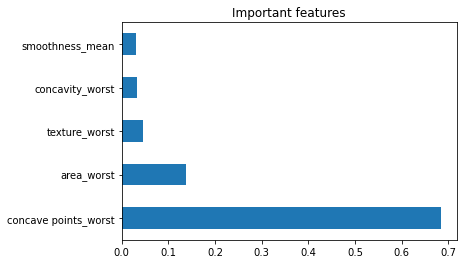

In [64]:
(pd.Series(clf_1.feature_importances_, index=X.columns).nlargest(5).plot(kind='barh'))
plt.title("Important features")
plt.show()

In [65]:
from sklearn.metrics import classification_report
print("Classification report: \n", classification_report(y_testset, y_pred))

Classification report: 
               precision    recall  f1-score   support

           B       0.94      0.97      0.96        66
           M       0.96      0.92      0.94        48

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



Text(0.5, 1.0, 'Confusion Matrix')

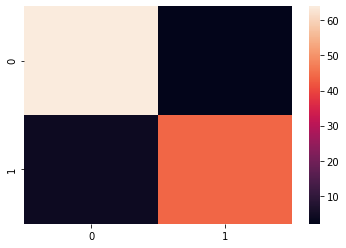

In [66]:
import seaborn as sn
cm_1 = confusion_matrix(y_testset,y_pred, labels=['B','M'])
cm_1
plt.figure()
sn.heatmap(cm_1)
ax.set_title('Confusion Matrix')